# DS-SF-25 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [4]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
df.shape

(400, 4)

Answer: 400

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [7]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: GRE is a score 0-800 while GPA is from 0-4. 800 >> 4.

> ### Question 4.  Drop data points with missing data.

In [8]:
df.dropna(inplace=True)
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [9]:
pd.isnull(df).any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

Answer: The number of rows decreased by 3 compared to the original dataframe. The above 'isnull' check also shows that there are no null values in any of the rows.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

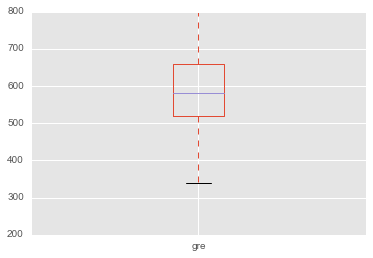

In [10]:
axes = df[['gre']].boxplot(return_type='axes')

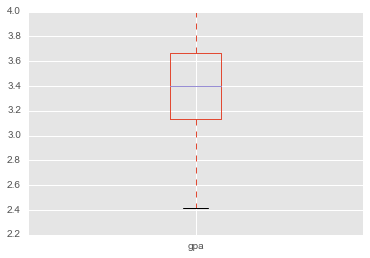

In [11]:
axes = df[['gpa']].boxplot(return_type='axes')

> ### Question 7.  What do boxplots show?

Answer: The median, quartiles, max/min, and any outliers in the data.

> ### Question 8.  Plot the distribution of each variable.

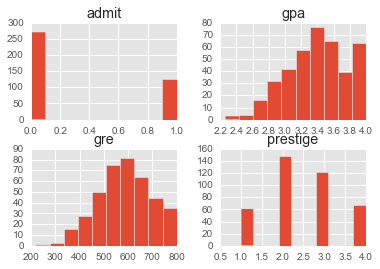

In [12]:
hist = df[df.columns].hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: GPA and GRE are not normally distrubted and have a positive skew that would require correction. They are skewed because they have limits (0-4 & 0-800 respectively).

> ### Question 10.  Create a correlation matrix for the dataset

In [13]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GPA and GRE are potentially colinear. Prestige is negatively correlated to admit while GRE and GPA are positively correlated.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

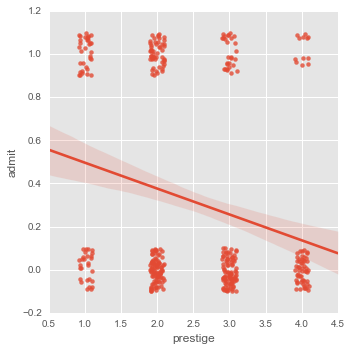

In [33]:
reg = sns.lmplot('prestige','admit',df,x_jitter=0.1, y_jitter=0.1)

In [34]:
X = df[ ['prestige'] ] # X is a DataFrame
y = df.admit # y is a Series
X = sm.add_constant(X)
model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 02 Aug 2016   Prob (F-statistic):           9.02e-07
Time:                        07:34:10   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: 
- Perform exploratory data analysis to determine if the data needs to be cleaned or transformed, plotting to help visualize the relationship, and examine any correlations between the variables.
- Intuitively, one would expect that a more prestigious university (lower prestige score) would result in higher admittance.
- Form null hypothesis.
- Build simple models: admit = prestige (try both with and without a constant).
- Investigate the results of the models and accept/reject the null hypothesis.

> ### Question 13.  What is your hypothesis?

Answer: The null hypothesis is Admit = B0 + B1 x Prestige; and the coefficients are zero.